## Gene Enrichment analysis

In [90]:
!pip install gseapy

In [91]:
%matplotlib inline
%config InlineBackend.figure_format='retina' 
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import gseapy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
names = gseapy.get_library_name()
print(names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Per

In [94]:
import pandas as pd

df = pd.read_csv('updated_pepts_with_classifications.tsv', sep="\t")
gene_list_more2 = df['gene'].to_list()
for gene in gene_list_more2:
    print(gene)

COL6A1
IGHG2
SLC38A10
HDGF
SERPINA1
AKAP12
CHGB
COL6A2
CORO7
MGAM
PLEC
IGHG3
ITPKB
CBR4
THRAP3
LMO7
PSMD13
MYH11
CAND2
PGM1
FGL1
GOLGA3
NOP56
PDCD4
SORBS3
CAVIN2
RRBP1
PCMT1
SLC30A9
GAA
GSPT1
EML4
CYBRD1
IGKV1D-39
APIP
CD99
IQGAP2
SYTL4
AHNAK
ESD
SLC44A2
H1-6
ENO3
DNAJC10
GFAP
IGHV3-74
GPLD1
DMD
CTSC
ATP6V1E2
ARHGEF18
C8A
KRT7
FABP1
PALM
SUMF2
MYH9
PPL
MYOM3
ACAT2
CHD4
GTF3C3
SLK
IGKV1-8
IGKV2D-29
GSTO1
CLU
RPL13
ADD1
TG
GLRX5
TRDN
TNKS1BP1
CFH
HCLS1
TNXB
HSPB6
ETFB
SYNPO2
TPSAB1
AHNAK2
FLG
SUCLA2
TNC
PDLIM5
PRKCSH
ACTN2
KLK1
LAMA2
TBCK
ADH1C
MYOF
HSP90B1
C7
GSN
ZSCAN18
DCAF8
RTN3
TBC1D9B
WNK1
SIGLEC1
HSPG2
A2M
SYNM
FLNB
FEZ2
TRAPPC10
SEPTIN11
PPP1R2B
TMEM132A
SPEN
DMAC1
ACAD9
MUC2
UGT2A2
SYNE2
POLR1A
ITGAV
INF2
HPS4
PDCD6IP
ZXDC
CHGA
IST1
MCCC1
PRUNE2
NUCB2
SARDH
KLHL15
WDR4
ANKLE2
PFAS
NDUFV3
RIPK2
SERPINF1
SEC23IP
MIA3
ZNF579
SON
TAP1
ATXN1
NIBAN1
PTPRN2
LAMA5
MROH1
HLA-B
CLGN
FCGBP
FLVCR1
PNPLA6
PRL
CYP2C9
GSTM1
EPB41L3
PARP10
HAL
AKAP9
LRRFIP1
OBSL1
MUC5AC
DMRT2
PNP
ANPEP
FLG2
PNP

CPN2
ATL2
PPIG
TM9SF1
STX17
RABEPK
ABCG8
FOXJ3
KCNJ11
FAM186A
UQCRC2
NANS
CDC42BPA
MOCOS
CCDC69
DNAI4
C18orf21
MAGEA10
ADAMTSL3
PRPH
SLC16A7
AGMAT
GYG2
CEP57
TEFM
DHRS4
MYCT1
SLCO1B1
SIGLEC9
RABGGTA
BPI
TSFM
MYOZ3
ENGASE
PTPRJ
PTGR1
PIP4K2A
CHD1L
LIMCH1
NOLC1
IMMT
SFTPA1
CCT5
PMP2
POM121
IKBIP
DDT
LMAN1
MYBPC2
HOMER3
EIF2B5
PIK3AP1
PPFIA1
ATP5PO
GPSM1
LYRM4
KLK13
GATM
PRPF4B
SPRR1A
TCIRG1
P3H1
IGKJ4
DCTN2
ATP10B
SERPINA5
COL10A1
ADAM28


In [96]:
gene_highly_variants = df[(df['highly_modified']==True)]
over_express_list = gene_highly_variants['gene'].to_list()
for gene in over_express_list:
    print(gene)

IGHG2
SERPINA1
AKAP12
CHGB
COL6A2
PLEC
IGHG3
LMO7
MYH11
GOLGA3
NOP56
SORBS3
RRBP1
GAA
CD99
IQGAP2
AHNAK
DNAJC10
DMD
C8A
PPL
MYOM3
SLK
GSTO1
TG
TNKS1BP1
CFH
HCLS1
TNXB
SYNPO2
TPSAB1
AHNAK2
FLG
TNC
PDLIM5
PRKCSH
LAMA2
C7
GSN
WNK1
HSPG2
A2M
SYNM
FLNB
MUC2
SYNE2
HPS4
PRUNE2
ANKLE2
PFAS
MIA3
TAP1
ATXN1
NIBAN1
LAMA5
HLA-B
FCGBP
CYP2C9
GSTM1
AKAP9
LRRFIP1
MUC5AC
ANPEP
FLG2
PRODH
NID1
ALDH1L1
MEGF6
EPPK1
MDN1
IFI16
OPLAH
MMUT
MAP4
ADPRHL1
SLC4A2
NID2
PALM2AKAP2
PRRC2C
LAMB1
HMCN2
PLIN4
SYNE1
ALDH4A1
LAMC1
CP
ECHDC3
PSG5
WASHC2A
SPARCL1
SMTN
IGHG4
OBSCN
CYP1B1
NIPSNAP3B
SORBS1
PIEZO1
FREM2
LAMC3
SPTA1
TNS1
TXNRD2
IGLV10-54
TMEM43
LTBP4
ERAP1
IGHV2-70D
SPEF2
GPX1
COL6A3
SVIL
POTEE
IGLV3-21
EPS8L1
TEP1
TPO
FLNA
EEF1A2
CEACAM5
PARP4
LUZP1
IGHG1
DST
MYO18A
PIH1D1
VAV3
POTEI
MAVS
PPIAL4E
PPIAL4F
LAD1
IFITM2
GBP1
POTEF
PCNT
CES1
OVGP1
GC
TACC2
CPOX
TNS3
MPC1
PRX
WDR62
ITIH5
SPINK5
EVPL
IGHA2
F13A1
FRAS1
TTN
BCAS1
ACIN1
LAMA4
DMGDH
FYCO1
GOLGB1
TOR1AIP1
PITRM1
EML2
LAMA3
COL15A1
A2ML1
GOLGA8N
MYLK
PRA

In [97]:
gene_list_more2_function = gp.enrichr(gene_list=over_express_list,
 gene_sets=['GO_Molecular_Function_2023', 'GO_Biological_Process_2023', 'GO_Cellular_Component_2021', "Reactome_2022"],
 organism='Human', 
#  background= gene_list_more2,                                      
 outdir='enrish_analysis',
 cutoff=0.5 
 )
gene_list_more2_function.results.head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,Actin Binding (GO:0003779),18/183,2.411769e-10,6.680599e-08,0,0,7.723715,171.045467,MACF1;GSN;SYNPO2;COBL;MYO9B;SORBS1;IQGAP2;SPTB...
1,GO_Molecular_Function_2023,Cadherin Binding (GO:0045296),20/319,6.002038e-08,8.312823e-06,0,0,4.737690,78.781067,NOP56;MACF1;LAD1;AHNAK;PPL;EVPL;GOLGA3;ARVCF;B...
2,GO_Molecular_Function_2023,Muscle Alpha-Actinin Binding (GO:0051371),4/14,4.076937e-05,3.764372e-03,0,0,27.166897,274.591564,SYNPO2;NRAP;PDLIM5;TTN
3,GO_Molecular_Function_2023,Alpha-Actinin Binding (GO:0051393),4/23,3.249188e-04,1.936238e-02,0,0,14.291833,114.791078,SYNPO2;NRAP;PDLIM5;TTN
4,GO_Molecular_Function_2023,Vinculin Binding (GO:0017166),3/10,3.495014e-04,1.936238e-02,0,0,29.011782,230.904860,SYNM;DMD;SORBS3
5,GO_Molecular_Function_2023,Ankyrin Binding (GO:0030506),3/18,2.178306e-03,1.005651e-01,0,0,13.533333,82.948611,OBSCN;SPTB;PLEC
6,GO_Molecular_Function_2023,Actinin Binding (GO:0042805),3/20,2.977884e-03,1.111196e-01,0,0,11.939964,69.449303,SYNPO2;PDLIM5;TTN
7,GO_Molecular_Function_2023,Kinase Binding (GO:0019900),15/460,3.502989e-03,1.111196e-01,0,0,2.327051,13.157468,MYOM1;GSN;PIH1D1;MYOM2;TTN;FAM83H;MAVS;WNK1;PO...
8,GO_Molecular_Function_2023,Protein Kinase Binding (GO:0019901),16/511,3.860205e-03,1.111196e-01,0,0,2.233675,12.412610,PRKCSH;PIH1D1;GSTP1;TTN;FAM83H;MAVS;WNK1;POTEI...
9,GO_Molecular_Function_2023,Protein-Glutamine Gamma-Glutamyltransferase Ac...,2/7,4.307241e-03,1.111196e-01,0,0,26.987671,147.014201,F13A1;TGM3


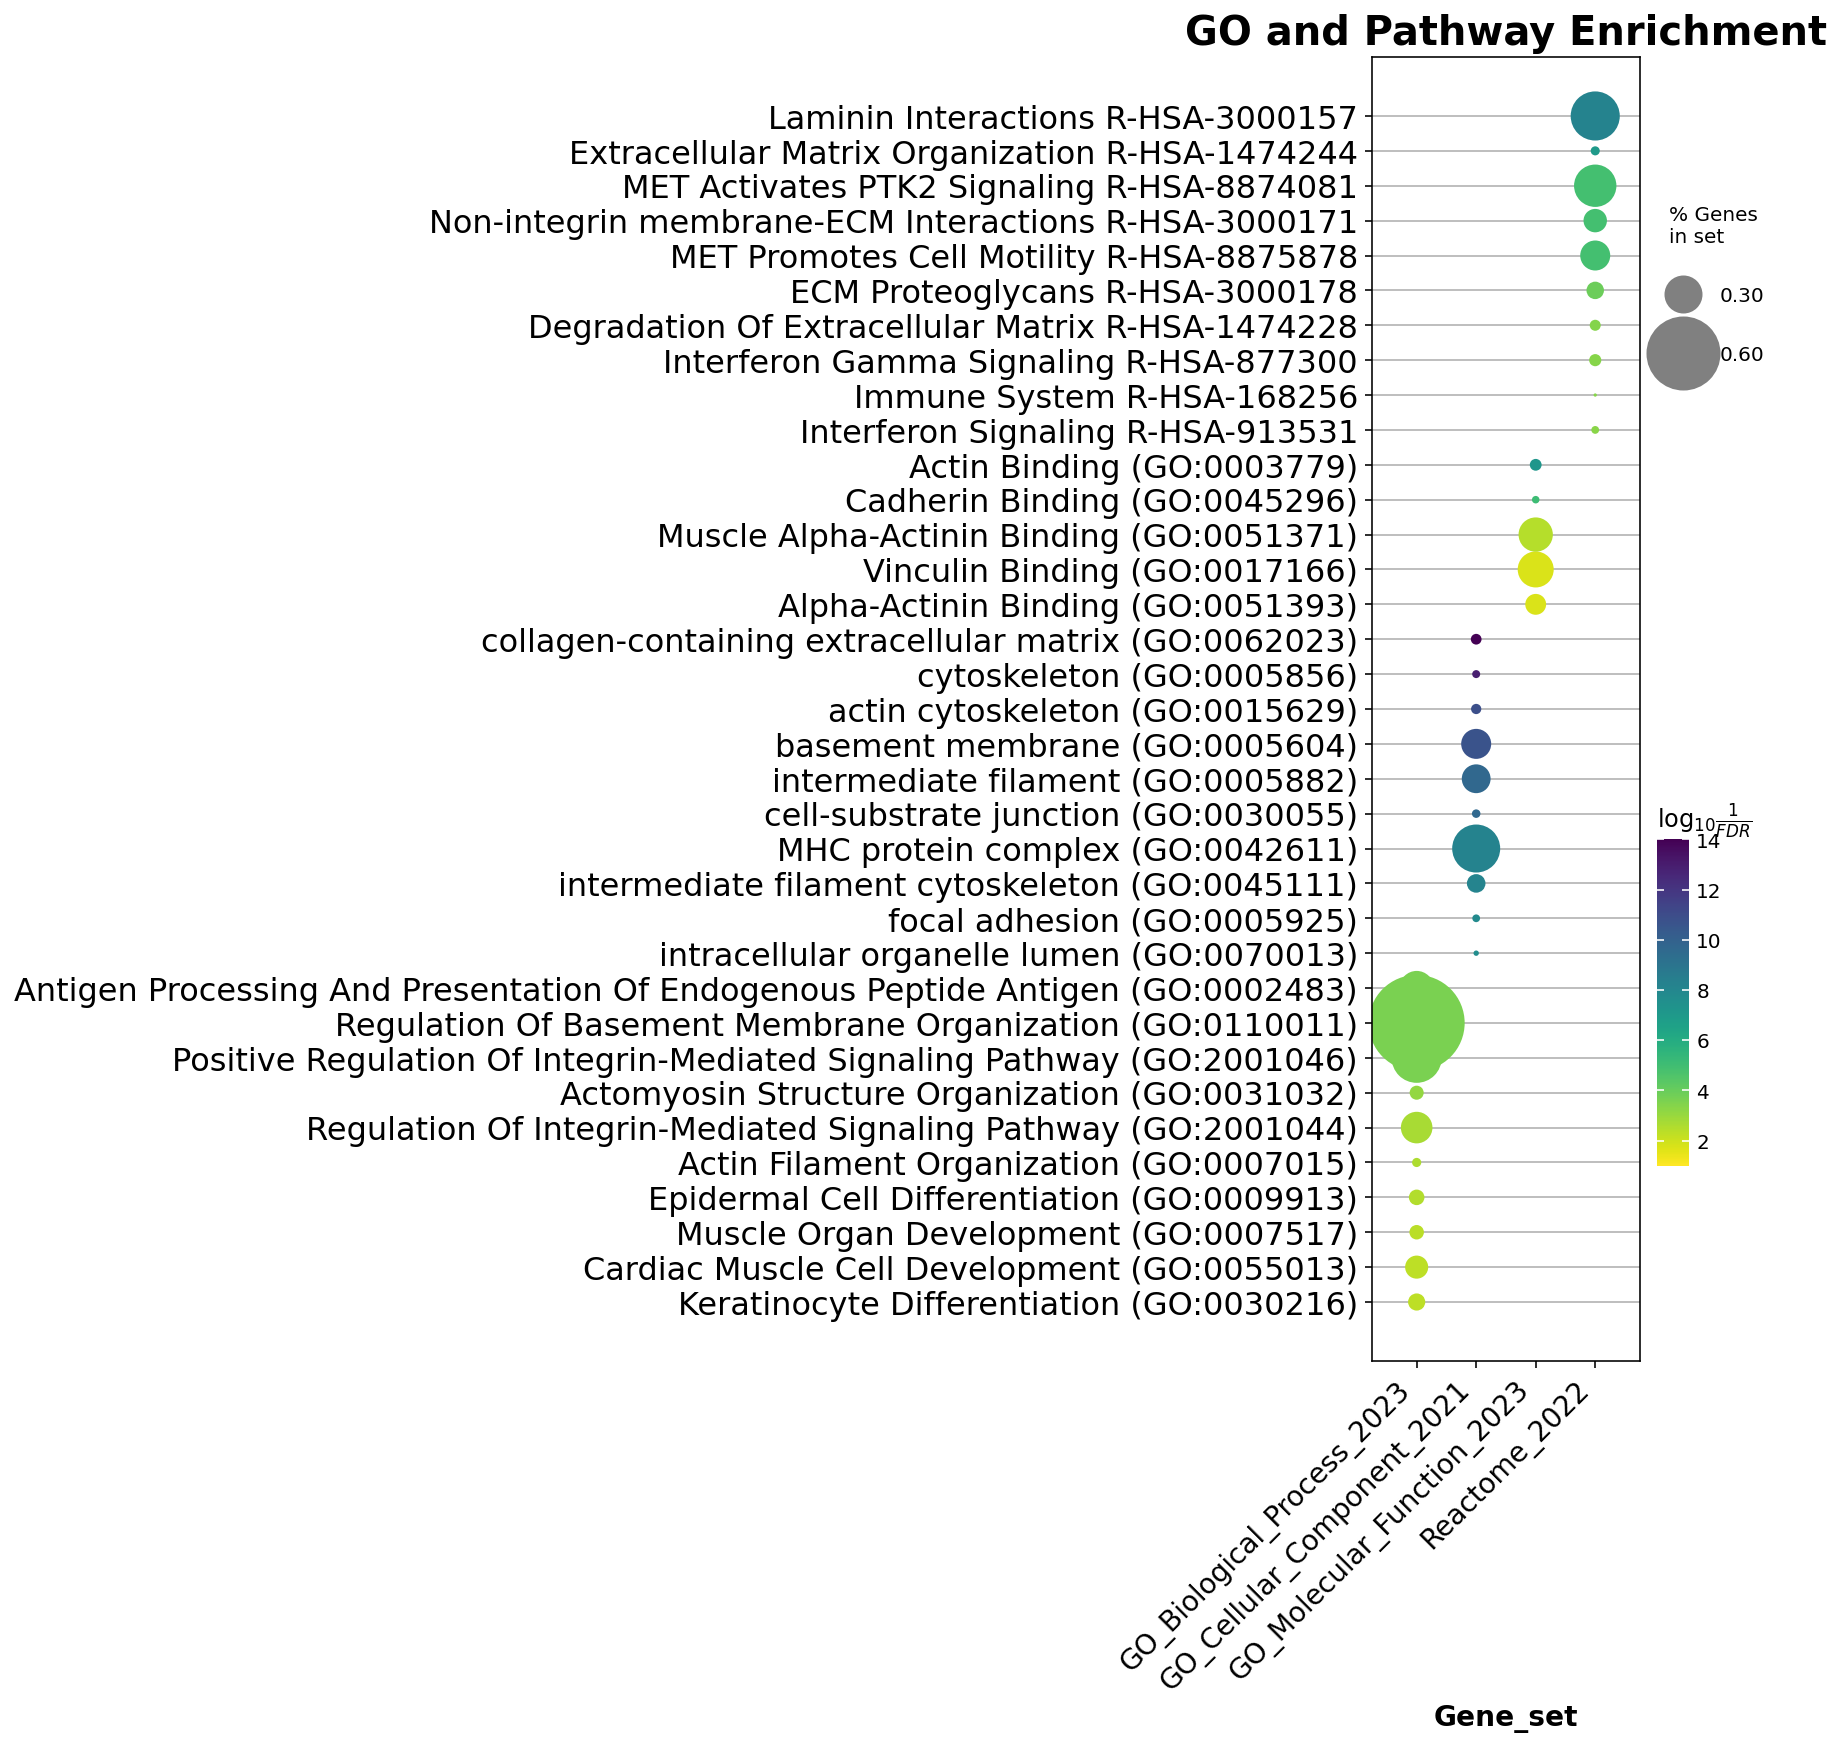

In [98]:
from gseapy.plot import barplot, dotplot
ax = dotplot(gene_list_more2_function.results,title='GO and Pathway Enrichment', 
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker='o',
              figsize=(3,12),
            )
ax.figure.savefig("GO Enrichment.svg")

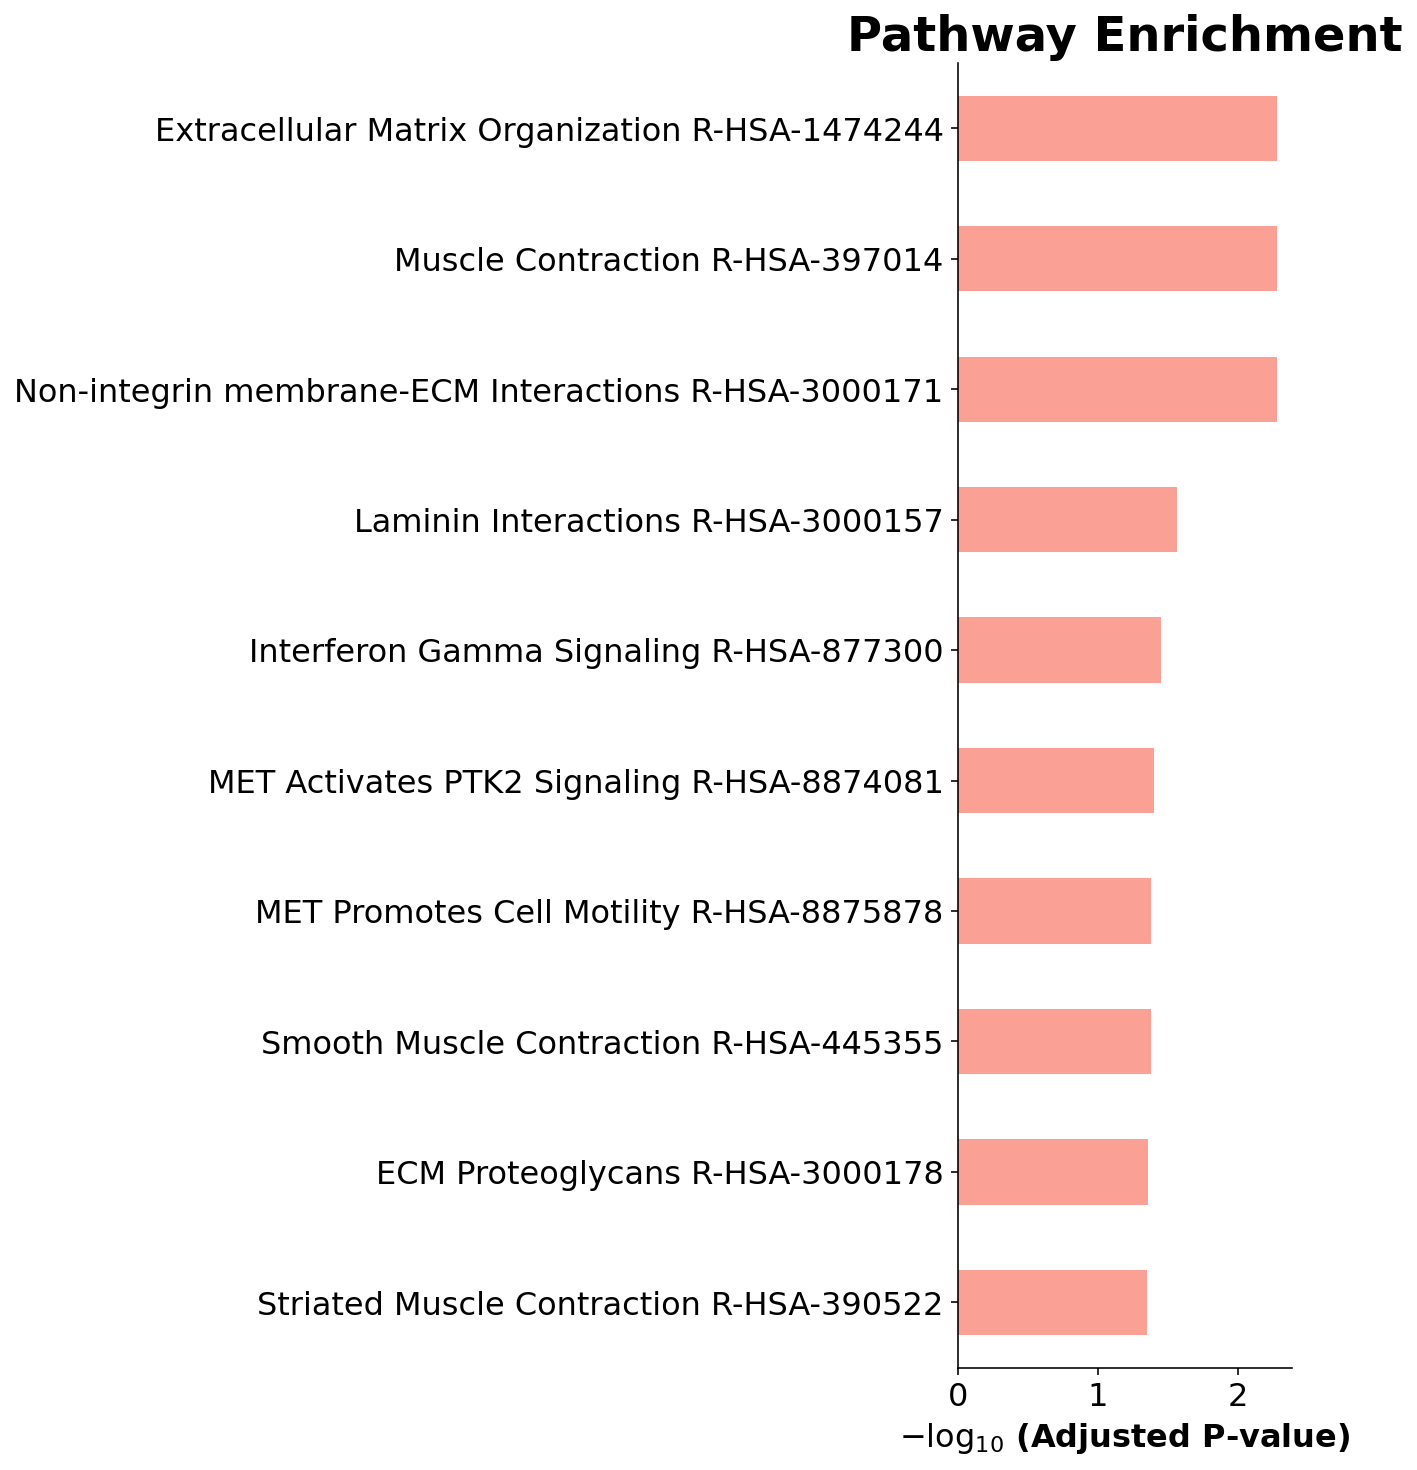

In [39]:
gene_list_more2_pathway = gp.enrichr(gene_list=over_express_list,
 gene_sets=['Reactome_2022'],
 organism='Human',  
 background=gene_list_more2,                                   
 outdir='enrish_analysis',
 cutoff=0.5 
 )
ax = barplot(gene_list_more2_pathway.results,title='Pathway Enrichment', 
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker='o',
              figsize=(3,12),
            )
ax.figure.savefig("Pathway_Enrich.svg")

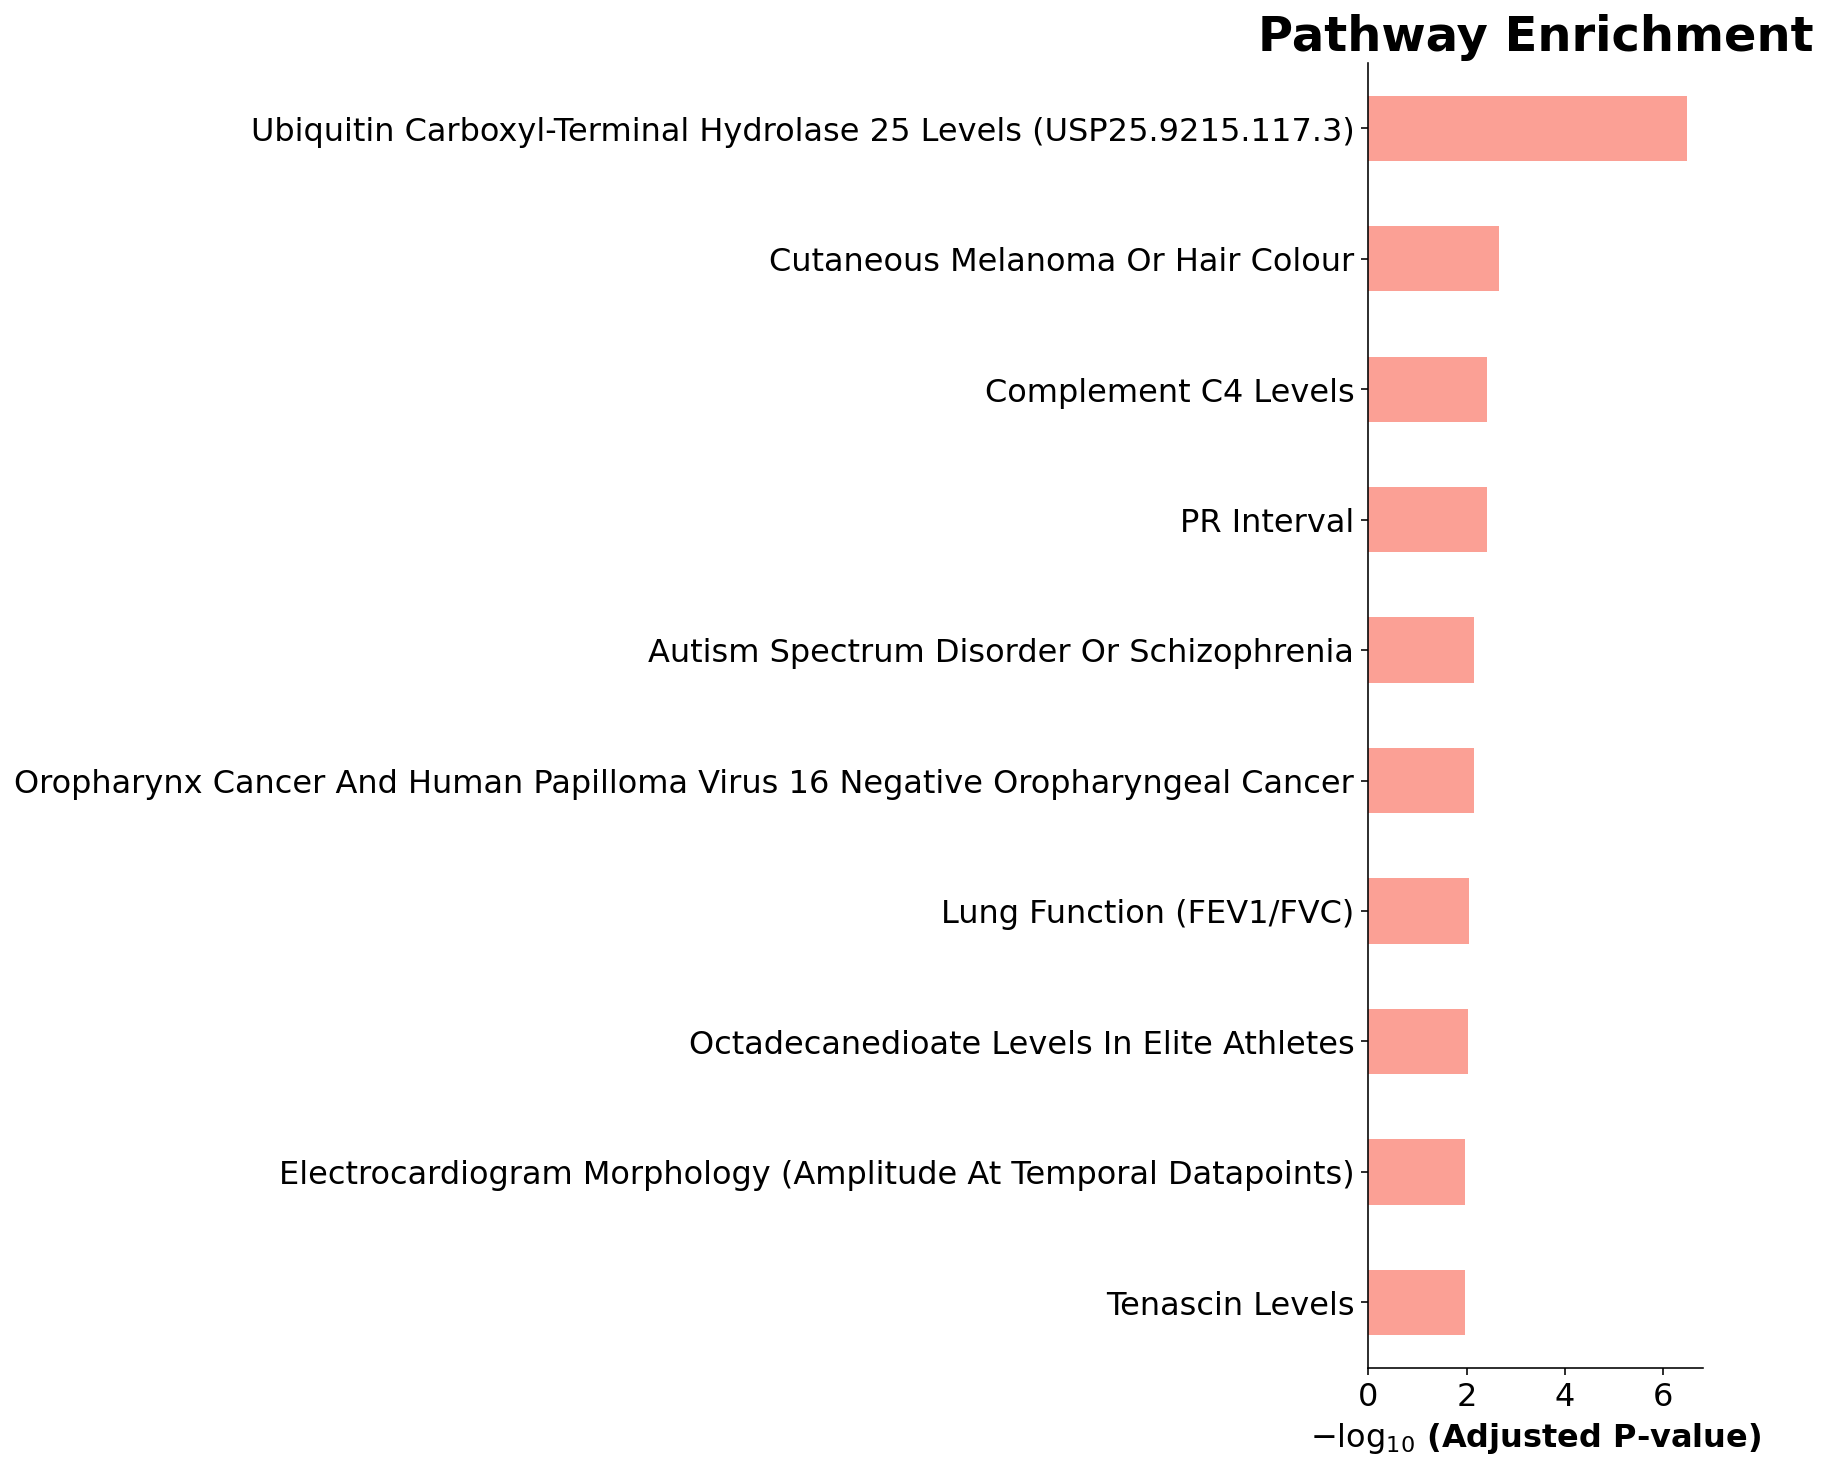

In [40]:
gene_list_more2_pathway = gp.enrichr(gene_list=over_express_list,
 gene_sets=['GWAS_Catalog_2023'],
 organism='Human',  
#background=gene_list_more2,                                   
 outdir='enrish_analysis',
 cutoff=0.5 
 )
ax = barplot(gene_list_more2_pathway.results,title='Pathway Enrichment', 
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker='o',
              figsize=(3,12),
            )
ax.figure.savefig("Pathway_Enrich.svg")